In [134]:
#importing libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
# creating an example
from sklearn.datasets import make_circles
x,y = make_circles(n_samples=1000, noise= 0.03, random_state=42)

In [136]:
x.shape, y.shape

((1000, 2), (1000,))

In [137]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [138]:
df = pd.DataFrame({"x1": x[:,0],"x2":x[:,1],"y": y})

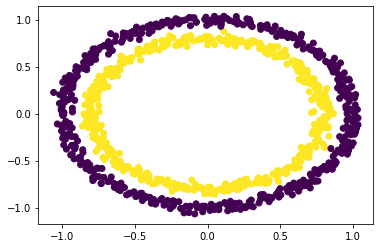

In [139]:
ax, fig = plt.subplots()
plt.scatter(df.x1, df.x2, c=y)

In [140]:
from tensorflow.python import metrics
#creating a model
tf.random.set_seed(42)
#1- Create the model and layers
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(6),
        tf.keras.layers.Dense(1)
    ]
    
)

#2-compile
model.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.SGD(lr=0.03),
    metrics= ["accuracy"]
)

#3-fiting the data
model.fit(x,y, epochs=100, verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [141]:
model.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.5000


[0.7016704082489014, 0.5]

In [142]:
y_predict = model.predict(x)

In [143]:
import math

In [144]:
y.shape,y_predict.shape

((1000,), (1000, 1))

In [145]:
pd.DataFrame(y_predict)

,0
0,0.435909
1,0.443243
2,0.443949
3,0.450905
4,0.417309
...,...
995,0.451755
996,0.436833
997,0.422232
998,0.418325


In [146]:
pd.DataFrame({"y":y_predict.squeeze(), "pre":y})

,y,pre
0,0.435909,1
1,0.443243,1
2,0.443949,1
3,0.450905,1
4,0.417309,0
...,...,...
995,0.451755,0
996,0.436833,0
997,0.422232,1
998,0.418325,0


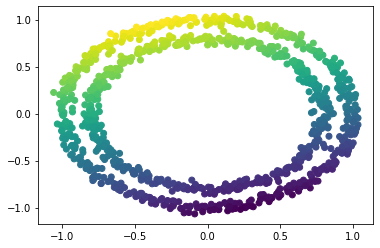

In [147]:
ax, fig = plt.subplots()
plt.scatter(df.x1, df.x2, c=y_predict)

In [148]:
#creating a model
tf.random.set_seed(42)
#1- create the model
model_2 = tf.keras.Sequential(
    [tf.keras.layers.Dense(4, activation= "relu"),
     tf.keras.layers.Dense(4, activation= "relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")]
)
#2- compile
model_2.compile(
    loss= tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#3-fitting data
history = model_2.fit(x,y, epochs=20)




Epoch 1/20
32/32 [==============================] - 1s 3ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/20
32/32 [

In [149]:
model_2.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.5630


[0.6696737408638, 0.5630000233650208]

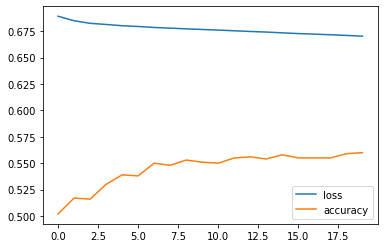

In [150]:
pd.DataFrame(history.history).plot()

In [151]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [152]:
from numpy import float32
A= tf.range(-10,10, dtype=float32)

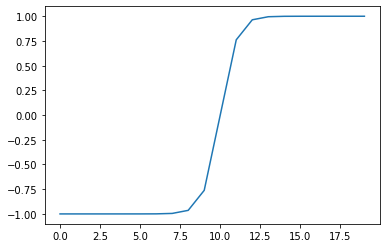

In [153]:
plt.plot(tf.keras.activations.tanh(A))

In [154]:
#creating model 3
tf.random.set_seed(42)
#1-the model
model= tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation="relu"),
       tf.keras.layers.Dense(4, activation="relu"),
       tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)


#2-compile
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(lr=0.02),
    metrics = ["accuracy"]

)
# craete lr 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

#3- fit with data

history = model.fit(x,y, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 3ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.4990 - lr: 1.1220e-04
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.4990 - lr: 1.2589e-04
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5060 - lr: 1.4125e-04
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5120 - lr: 1.5849e-04
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5120 - lr: 1.9953e-04
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5120 - lr: 2.2387e-04
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6850 - ac

In [155]:
model.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5000


[0.6957675814628601, 0.5]

In [156]:
import numpy as np

In [157]:
10**-10

1e-10

In [158]:
df


,x1,x2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


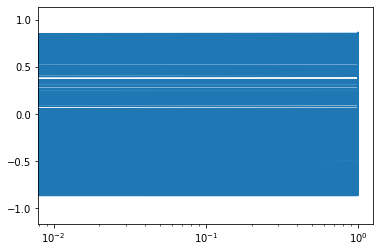

In [159]:
plt.semilogx(df.iloc[:,2],df.iloc[:,0])
plt.scatter(10**-2,0.01)

In [160]:
#creat a confusion matrix with skleatn
from sklearn.metrics import confusion_matrix

In [161]:
pre_y = model.predict(x)

In [162]:
#creating model 3
tf.random.set_seed(42)
#1-the model
model= tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation="relu"),
       tf.keras.layers.Dense(4, activation="relu"),
       tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)


#2-compile
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(lr=0.02),
    metrics = ["accuracy"]

)
# craete lr 

#3- fit with data

history = model.fit(x,y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 3ms/step - loss: 0.6807 - accuracy: 0.5680
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.5800
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6440 - accuracy: 0.6120
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5944 - accuracy: 0.7930
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5104 - accuracy: 0.7850
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3772 - accuracy: 0.8910
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2860 - accuracy: 0.9200
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.9560
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1440 - accuracy: 0.9820
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1155 - accuracy: 0.9850
Epoch 11/100
32/32 [=

In [163]:
pre_y = model.predict(x)

In [164]:
y,tf.math.round( pre_y)

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 

In [165]:
cm =  confusion_matrix(y,tf.math.round( pre_y))

In [166]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm)

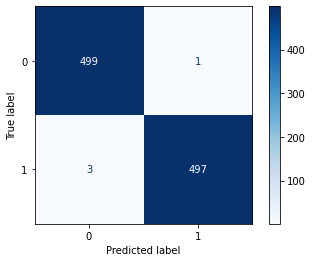

In [167]:
cmd.plot(cmap = plt.cm.Blues)

# New multi classification problem

In [168]:
# We are tring to create a model based in clothes_minst dataset form keras
import tensorflow as tf

In [169]:
tf

<module 'tensorflow' from '/usr/local/lib/python3.7/dist-packages/tensorflow/__init__.py'>

In [170]:
from tensorflow.keras.datasets import fashion_mnist



In [171]:
(train_data , train_label), (test_data , test_label) = fashion_mnist.load_data()

In [172]:
print(f"training sample : {train_data[0]}",)
print(f"tranining label : {train_label[0]}"
)

training sample : [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

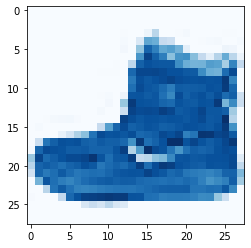

In [173]:
# plot an example
import matplotlib.pyplot as plt
plt.imshow(train_data[0], cmap= plt.cm.Blues)

In [174]:
# look to the data randomly
# buliding a list of the lables
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

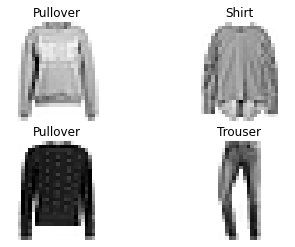

In [175]:
import random
for i in range(4):
  plt.subplot(2,2,i+1)
  rand = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand], cmap = plt.cm.binary)
  plt.title( class_names[train_label[rand]] )
  plt.axis(False)


In [176]:
train_data.max(), train_data.min(
    
)

(255, 0)

In [177]:
#building a model for multi classification problem
tf.random.set_seed(42)
#1-  the model
model = tf.keras.Sequential(
    [tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4, activation="relu"),
             tf.keras.layers.Dense(4, activation= "relu"),
     tf.keras.layers.Dense(10, activation="softmax")
     

    ]
)
# 2- compile the model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy() ,
    optimizer = tf.keras.optimizers.Adam(lr = 0.02),
    metrics = "accuracy"
)

# 3- fitting the data
history = model.fit(train_data/255, train_label, epochs=10, validation_data= (test_data/255, test_label))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4659 - accuracy: 0.3707 - val_loss: 1.2617 - val_accuracy: 0.4553
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1153 - accuracy: 0.5309 - val_loss: 0.9546 - val_accuracy: 0.6218
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9216 - accuracy: 0.6199 - val_loss: 0.8900 - val_accuracy: 0.6370
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8747 - accuracy: 0.6415 - val_loss: 0.8898 - val_accuracy: 0.6480
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8563 - accuracy: 0.6489 - val_loss: 0.8411 - val_accuracy: 0.6543
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8515 - accuracy: 0.6538 - val_loss: 0.8417 - val_accuracy: 0.6613
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8375 - accuracy: 0.6612 - val_loss: 0.8281 - val_accuracy:

In [178]:
model.evaluate(test_data, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 185.3102 - accuracy: 0.4284


[185.3101806640625, 0.4284000098705292]

# finding the ideal learning rate

In [179]:
from IPython.core.interactiveshell import validate
# new_model
tf.random.set_seed(42)
model2 = tf.keras.Sequential(
    [        tf.keras.layers.Flatten(input_shape=(28,28)),

        tf.keras.layers.Dense(4, activation="relu"),
             tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")

    ]
)

# compile

model2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics= "accuracy"
    
)
# creating a learing callback

lr_sh = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))


#fitting data
history = model2.fit(
    (train_data/255), train_label, epochs =20 , callbacks= [lr_sh], validation_data=((test_data/255),test_label)
)


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 5s

Text(0, 0.5, 'lr')

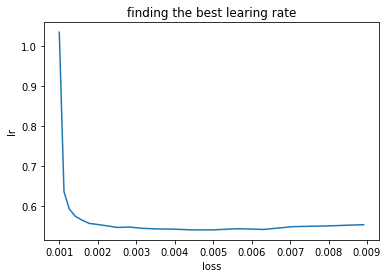

In [180]:
dic = history.history
plt.plot(dic["lr"], dic["loss"])
plt.title("finding the best learing rate")
plt.xlabel("loss")
plt.ylabel("lr")

In [181]:
from IPython.core.interactiveshell import validate
# new_model
tf.random.set_seed(42)
model2 = tf.keras.Sequential(
    [        tf.keras.layers.Flatten(input_shape=(28,28)),

        tf.keras.layers.Dense(4, activation="relu"),
             tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")

    ]
)

# compile

model2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.0016),
    metrics= "accuracy"
    
)



#fitting data
history = model2.fit(
    (train_data/255), train_label, epochs =20 , validation_data=((test_data/255),test_label)
)


Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0839 - accuracy: 0.6506 - val_loss: 0.8049 - val_accuracy: 0.7344
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7466 - accuracy: 0.7468 - val_loss: 0.7411 - val_accuracy: 0.7512
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6880 - accuracy: 0.7590 - val_loss: 0.7027 - val_accuracy: 0.7589
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6597 - accuracy: 0.7660 - val_loss: 0.6784 - val_accuracy: 0.7651
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6408 - accuracy: 0.7729 - val_loss: 0.6916 - val_accuracy: 0.7551
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6255 - accuracy: 0.7777 - val_loss: 0.6569 - val_accuracy: 0.7710
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6163 - accuracy: 0.7812 - val_loss: 0.6481 - val_accuracy:

In [182]:
import pandas as pd

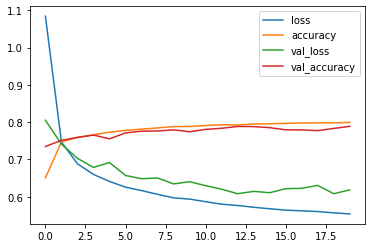

In [183]:
pd.DataFrame(history.history).plot()

In [184]:
from sklearn.metrics import confusion_matrix

In [185]:
from pandas.core.algorithms import mode
# model prediction
pred = model2.predict(test_data/255)

In [186]:
import numpy as np

In [187]:
np.unique(train_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [188]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [189]:
pred[2]

array([6.8381839e-03, 9.7376120e-01, 3.1712573e-04, 1.7513281e-02,
       3.0567142e-05, 8.6953578e-06, 1.5035062e-03, 5.2793055e-08,
       2.7302709e-05, 4.5947584e-09], dtype=float32)

In [190]:
pred.shape

(10000, 10)

In [191]:
final_labels = tf.argmax(pred,axis=1)

In [192]:
final_labels.shape

TensorShape([10000])

In [193]:
cm = confusion_matrix(test_label,tf.argmax(pred,axis=1) )

In [194]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

In [195]:
disp = cmd(cm, display_labels=class_names)

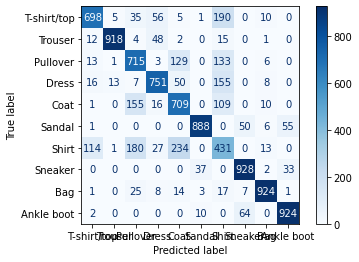

In [196]:
disp.plot(cmap= plt.cm.Blues)


In [197]:
# fun function 
#1- select random image
#2- predict the image
#3- plot with the labels

In [198]:
import matplotlib
from importlib import reload
import matplotlib.pyplot as plt

In [199]:
def fun_func(data, model):
 # constants
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  randnum = np.random.randint(0,data.shape[0])

  #1- select a random image
  image = data[randnum:randnum+1]
  #2-predict
  img_norm = image/255         # normalization
  predicted_label= model.predict(img_norm) # predict
  label = tf.argmax(predicted_label, axis=1)
  # 3- plot the image
  plt.imshow(data[randnum],  cmap= plt.cm.binary)
  plt.title(class_names[label.numpy()[0]])
  plt.axis(False)
  

In [200]:
train_data[0:1].shape


(1, 28, 28)

<img src="C:\Users\user\Desktop\index.png">

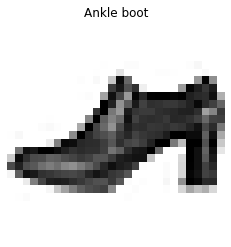

In [201]:
fun_func(train_data, model2)



In [202]:
pre =model2.predict(train_data[0:1]/255)

In [203]:
pre

array([[1.7857797e-08, 2.4699564e-33, 7.8286520e-13, 3.2811542e-14,
        7.8056463e-13, 4.4127728e-04, 2.8123749e-08, 3.0443210e-02,
        1.8090025e-08, 9.6911544e-01]], dtype=float32)

In [204]:
  label = tf.argmax(pre, axis=1)


In [205]:
label.numpy()[0]

9